In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float", "{:.2f}".format)


2024-03-19 19:35:47.838669: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 19:35:47.841732: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-19 19:35:47.894251: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 19:35:49.022162: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = pd.read_csv('cars.csv')
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [4]:
# Drop all categorical features
data_num = data.copy()

for i in data.columns:
    if data_num[i].dtype == "object":
        data_num.drop(i, axis=1, inplace=True)
data_num.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00


In [5]:
data.shape

(205, 26)

In [6]:
data.set_index('car_ID', inplace=True)
data.index.name = None
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


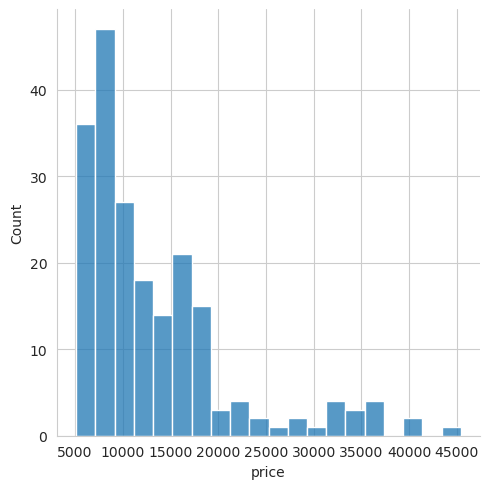

In [7]:
sns.displot(data.price, bins=20)

/tmp/ipykernel_199733/1767939423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

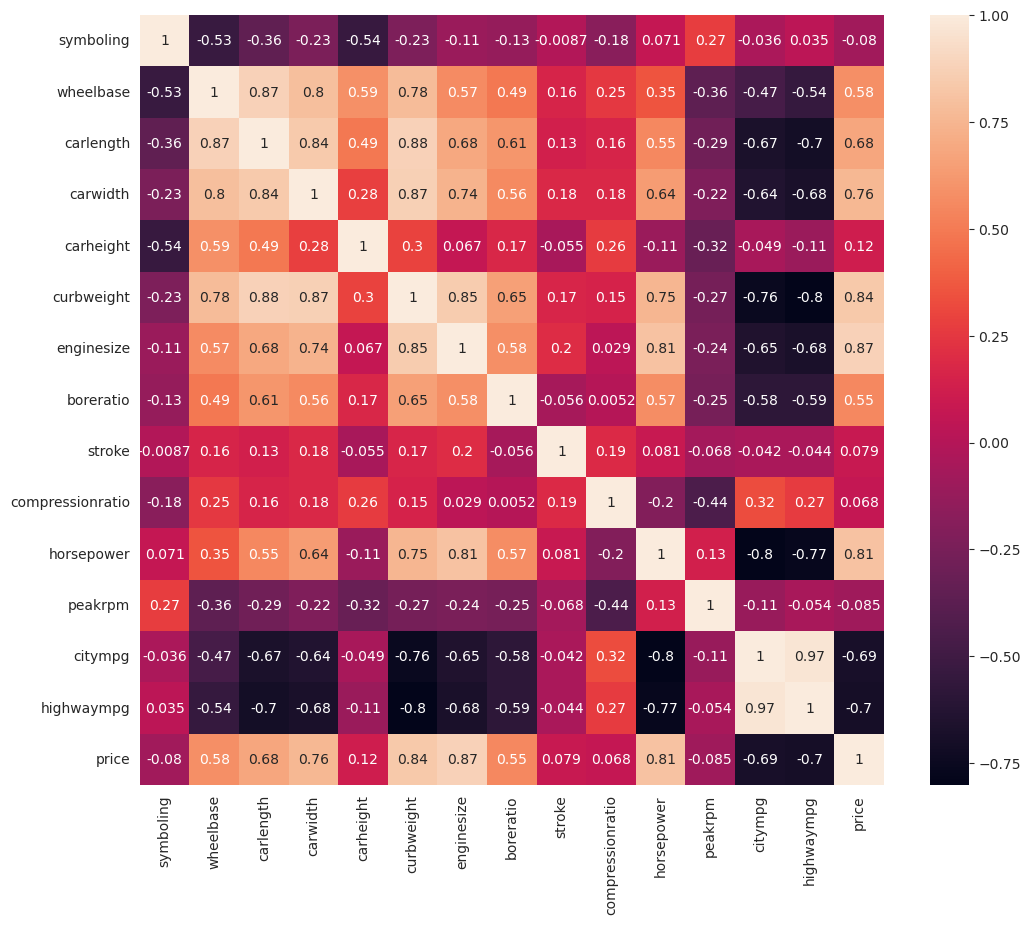

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

In [9]:
data.CarName.value_counts()


toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [10]:


data['brand'] = data.CarName.str.split(' ', expand=True)[0].str.lower()

data['brand'] = data.brand.str.replace('toyouta', 'toyota')
data['brand'] = data.brand.str.replace('porcshce', 'porsche')
data['brand'] = data.brand.str.replace('maxda', 'mazda')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')

data.brand.value_counts()



toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: brand, dtype: int64

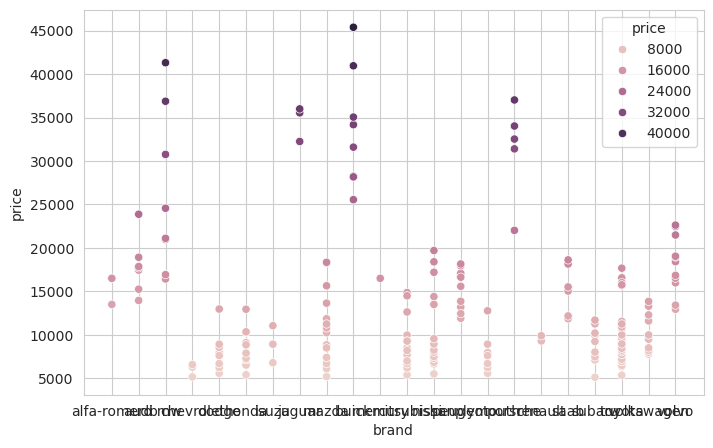

In [11]:


plt.figure(figsize=(8, 5))
sns.scatterplot(x='brand', y='price', data=data, hue='price')

data.drop('CarName', axis=1, inplace=True)

In [12]:


object_features = data.select_dtypes(include=('object')).columns.tolist()
object_features



['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [13]:
data_1 = pd.get_dummies(data, columns=object_features, drop_first=True, dtype='uint8')

In [14]:


X = data_1.drop('price', axis=1)
y = data_1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)



In [15]:
def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')
    elif not train:
        print("=========Testing Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')

# XGB

In [16]:


import xgboost as xgb

# Create XGBoost regressor
xgb_model = xgb.XGBRegressor()

# Fit XGBoost model to training data
xgb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Print evaluation metrics for XGBoost model
print("XGBoost - Training Set:")
print_evaluate(y_train, y_train_pred_xgb, train=True)

print("XGBoost - Testing Set:")
print_evaluate(y_test, y_test_pred_xgb, train=False)




XGBoost - Training Set:
========Training Result=======
MAE:		 68.4972
MSE:		 88232.1983
RMSE:		 297.0391
R2 Square:	 0.9986
XGBoost - Testing Set:
=========Testing Result=======
MAE:		 2210.1462
MSE:		 9738971.5181
RMSE:		 3120.7325
R2 Square:	 0.8594


# RF

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest regressor
rf_model = RandomForestRegressor()

# Fit Random Forest model to training data
rf_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


print("Random Forest - Training Set:")
print_evaluate(y_train, y_train_pred_rf, train=True)

print("Random Forest - Testing Set:")
print_evaluate(y_test, y_test_pred_rf, train=False)


Random Forest - Training Set:
========Training Result=======
MAE:		 597.4896
MSE:		 781806.3634
RMSE:		 884.1981
R2 Square:	 0.9872
Random Forest - Testing Set:
=========Testing Result=======
MAE:		 1740.6162
MSE:		 5445256.0648
RMSE:		 2333.5072
R2 Square:	 0.9214


# GradientBoostingRegressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Create Gradient Boosting regressor
gb_model = GradientBoostingRegressor()

# Fit Gradient Boosting model to training data
gb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting - Training Set:")
print_evaluate(y_train, y_train_pred_gb, train=True)

print("Gradient Boosting - Testing Set:")
print_evaluate(y_test, y_test_pred_gb, train=False)


Gradient Boosting - Training Set:
========Training Result=======
MAE:		 426.6737
MSE:		 353786.7701
RMSE:		 594.7998
R2 Square:	 0.9942
Gradient Boosting - Testing Set:
=========Testing Result=======
MAE:		 1908.3168
MSE:		 6819188.7366
RMSE:		 2611.3576
R2 Square:	 0.9016


# SVR

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create Support Vector Machine regressor
svm_model = make_pipeline(StandardScaler(), SVR())

# Fit SVM model to training data
svm_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine - Training Set:")
print_evaluate(y_train, y_train_pred_svm, train=True)

print("Support Vector Machine - Testing Set:")
print_evaluate(y_test, y_test_pred_svm, train=False)

Support Vector Machine - Training Set:
========Training Result=======
MAE:		 5507.5113
MSE:		 67672824.9340
RMSE:		 8226.3494
R2 Square:	 -0.1103
Support Vector Machine - Testing Set:
=========Testing Result=======
MAE:		 5465.9810
MSE:		 73924527.5955
RMSE:		 8597.9374
R2 Square:	 -0.0670


In [20]:


rfe_30 = RFE(xgb_model, n_features_to_select=30)
rfe_30.fit(X_train, y_train)

print(rfe_30.support_)
print(rfe_30.ranking_)



[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True False  True False  True False  True False
 False False  True False False False False False False False False False
  True False False False  True False  True False  True False False False
 False  True False False  True  True False False  True  True False False
 False  True False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1 28  1  1  3  1  4  1  5  1 21
 18  9  1 25 29 31 33 12 27 30 32 22  1 16 15 23  1  8  1 26  1 24  6 10
 13  1 14  7  1  1  2 17  1  1 20 11 19  1 34 35]


In [21]:
y_train_pred = rfe_30.predict(X_train)
y_test_pred = rfe_30.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)


========Training Result=======
MAE:		 69.6422
MSE:		 88244.8551
RMSE:		 297.0604
R2 Square:	 0.9986
=========Testing Result=======
MAE:		 2222.0839
MSE:		 9799394.6587
RMSE:		 3130.3985
R2 Square:	 0.8586


# ANN 

In [22]:


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [23]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:


r = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    batch_size=1,
    epochs=300
)



Epoch 1/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 230559664.0000 - val_loss: 139738336.0000
Epoch 2/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54462292.0000 - val_loss: 18209950.0000
Epoch 3/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10418215.0000 - val_loss: 12654233.0000
Epoch 4/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7663325.0000 - val_loss: 10453495.0000
Epoch 5/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5182241.5000 - val_loss: 8605800.0000
Epoch 6/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4049444.2500 - val_loss: 6520779.0000
Epoch 7/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3278769.0000 - val_loss: 6269691.0000
Epoch 8/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3796911.2500 - val_loss: 10064549.0000
Epoch 9/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4224711.5000 - val_loss: 7073723.5000
Epoch 10/300
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3013604.7500 - val_loss: 6363806.5000

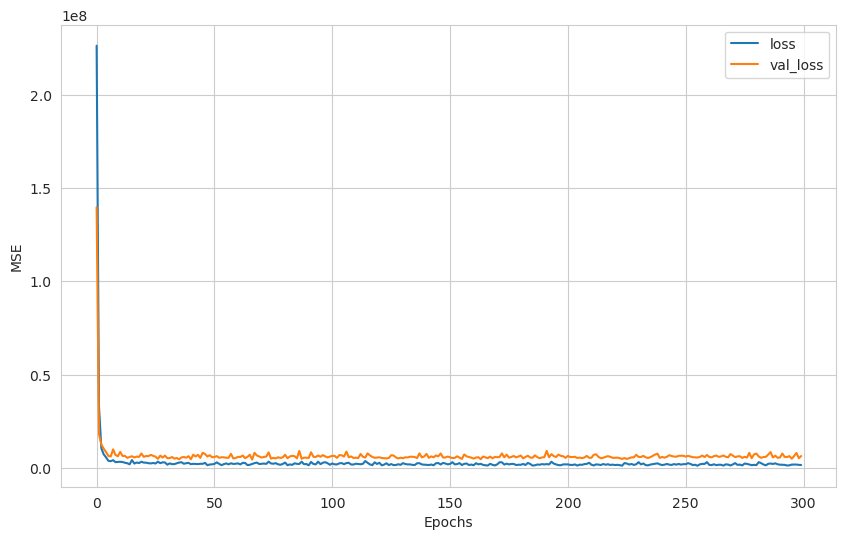

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
========Training Result=======
MAE:		 644.9929
MSE:		 888044.9415
RMSE:		 942.3614
R2 Square:	 0.9854
=========Testing Result=======
MAE:		 1883.3178
MSE:		 6478375.2287
RMSE:		 2545.2653
R2 Square:	 0.9065


In [27]:
# Save the trained model
model.save("ann_model.h5")


In [37]:
from keras.losses import mean_squared_error
from keras.models import load_model
# Load the saved model and specify the custom loss function
loaded_model = load_model("ann_model.h5", custom_objects={'mean_squared_error': mean_squared_error})

